# CS4035 - Cyber Data Analytics
## Lab 3 

## Group Number: 69

## Student 1 
### Name : Konrad Ponichtera
### ID : 5580749

## Student 2
### Name : Ion Babalau
### ID : 5626110

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer

import time


In [2]:
nb = nbformat.read("Lab3.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 318


## README

Expected location of dataset: _data_ directory, in same directory as notebook. 
All the necessary packages are specifeid in _requirements.txt_, and can be installed with the command: `pip install -r requirements.txt`

## 1. Familiarization and discretization task – 1 A4 (5 Points)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [3]:
df = pd.read_csv("data/dataset_10/capture20110818.binetflow")

infected_hosts = [
'147.32.84.165',
'147.32.84.191',
'147.32.84.192',
'147.32.84.193',
'147.32.84.204',
'147.32.84.205',
'147.32.84.206',
'147.32.84.207',
'147.32.84.208',
'147.32.84.209'
]

print('Dataset size:', len(df))

df.head()

Dataset size: 1309791


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


### Analyzing labels

In [4]:
def filter_benign(df):
    return df[~df['SrcAddr'].isin(infected_hosts)]


def filter_infected(df):
    return df[df['SrcAddr'].isin(infected_hosts)]

In [5]:
df_benign = filter_benign(df)
df_infected = filter_infected(df)

print('Data entries count:', len(df))
print('Data entries count from benign hosts:', len(df_benign))
print('Data entries count from infected hosts:', len(df_infected))

Data entries count: 1309791
Data entries count from benign hosts: 1203426
Data entries count from infected hosts: 106365


In [6]:
df_benign.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [7]:
df_infected.head()
#df_infected.Label.unique()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
90622,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS
90808,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS
90809,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...
90965,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS
90968,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt


In [8]:
print('Benign labels:', df_benign['Label'].unique())
print('Infected labels:', df_infected['Label'].unique())

Benign labels: ['flow=Background-TCP-Attempt' 'flow=Background-TCP-Established'
 'flow=Background-Established-cmpgw-CVUT' 'flow=To-Background-CVUT-Proxy'
 'flow=Background' 'flow=Background-UDP-Established'
 'flow=Background-UDP-Attempt' 'flow=From-Background-CVUT-Proxy'
 'flow=To-Background-UDP-CVUT-DNS-Server' 'flow=To-Background-Grill'
 'flow=Background-Attempt-cmpgw-CVUT'
 'flow=Background-UDP-NTP-Established-1' 'flow=Background-google-webmail'
 'flow=Background-google-analytics11' 'flow=From-Normal-V51-Grill'
 'flow=Background-google-analytics10' 'flow=From-Normal-V51-Stribrek'
 'flow=Background-google-analytics6' 'flow=To-Background-Stribrek'
 'flow=Background-google-analytics9' 'flow=To-Background-CVUT-WebServer'
 'flow=Background-google-analytics15' 'flow=Background-google-analytics2'
 'flow=From-Normal-V51-Jist' 'flow=Background-google-analytics8'
 'flow=To-Background-Jist' 'flow=Background-google-analytics3'
 'flow=Background-google-analytics14' 'flow=To-Background-MatLab-Ser

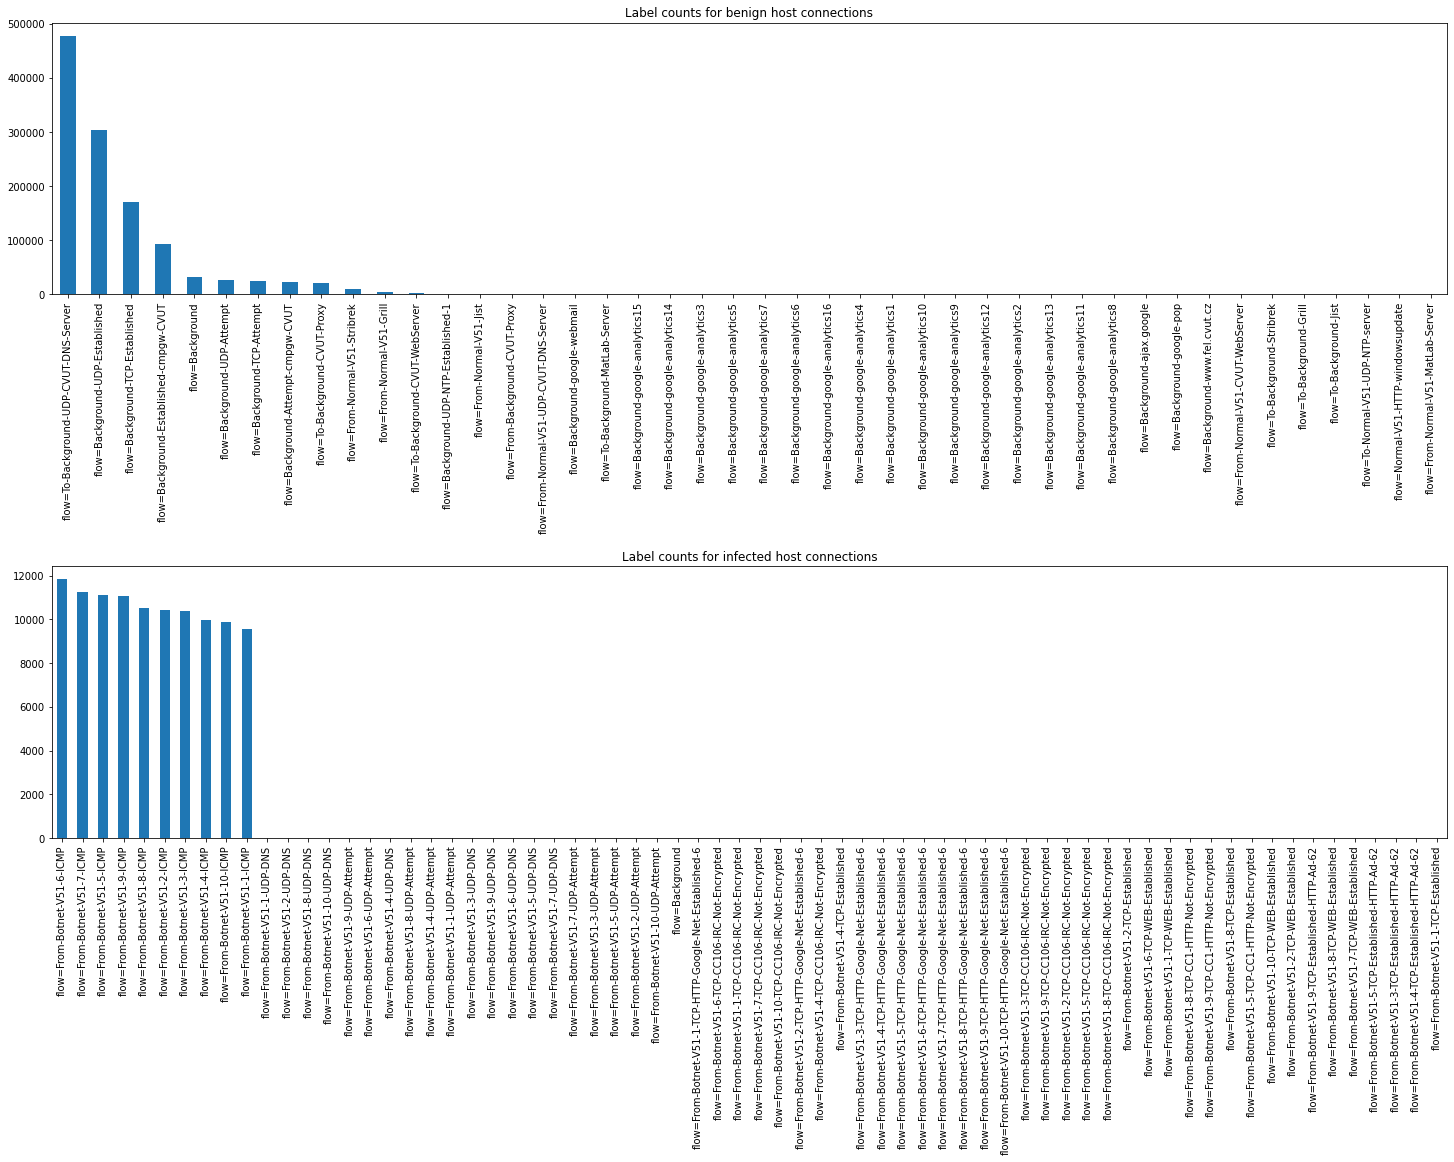

In [9]:
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 15))
plt.subplots_adjust(hspace=1)

df_benign['Label'].value_counts().plot(kind='bar', ax=ax1, title=f'Label counts for benign host connections')
df_infected['Label'].value_counts().plot(kind='bar', ax=ax2, title=f'Label counts for infected host connections')

plt.show()

### Visualizing features

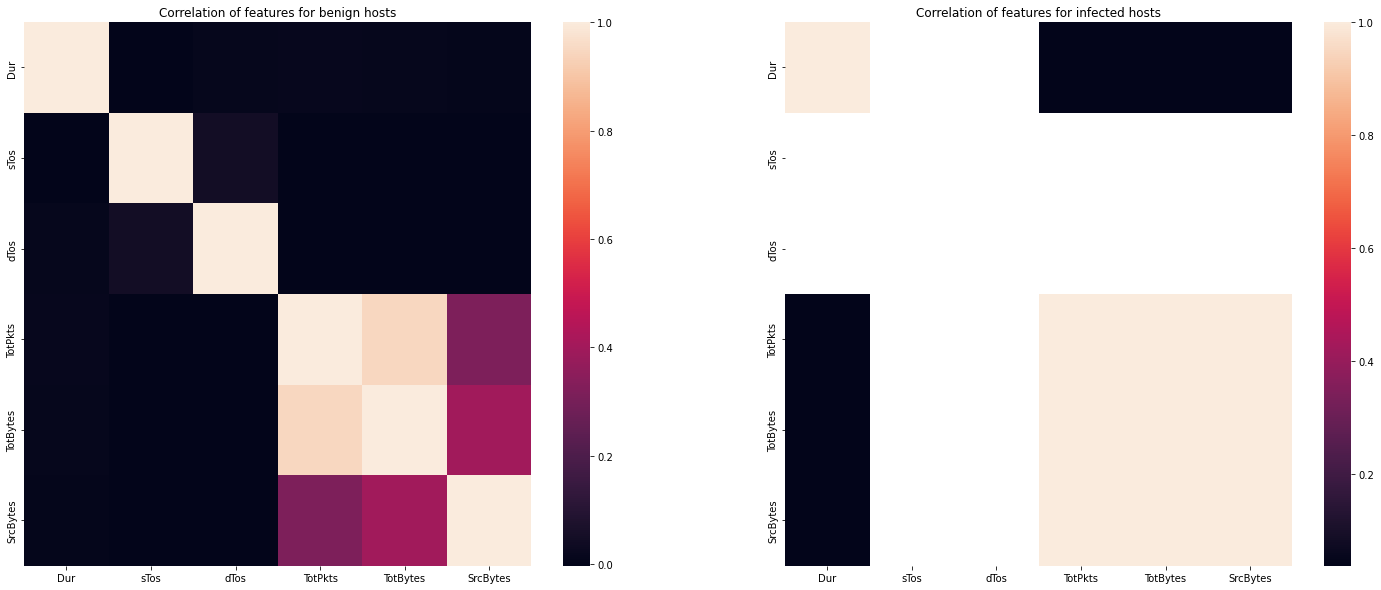

In [10]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

ax1.set_title('Correlation of features for benign hosts')
sns.heatmap(df_benign.corr(), ax=ax1)

ax2.set_title('Correlation of features for infected hosts')
sns.heatmap(df_infected.corr(), ax=ax2)

plt.show()

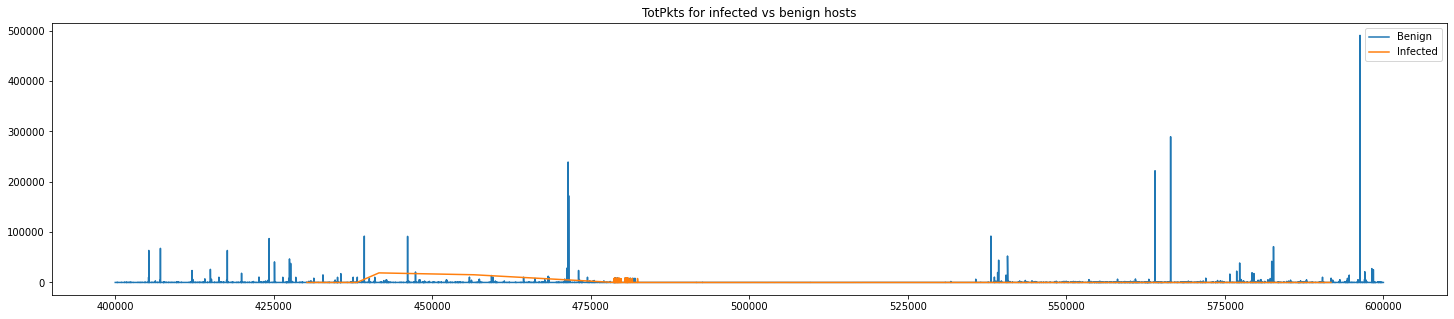

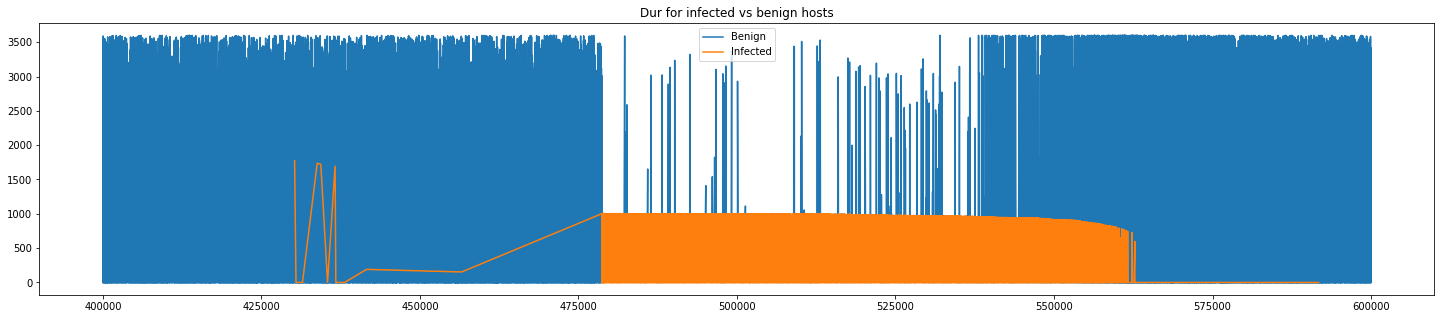

In [11]:
features = ['TotPkts', 'Dur']

df_fragment = df[400000:600000]

df_fragment_infected = filter_infected(df_fragment)
df_fragment_benign = filter_benign(df_fragment)

_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(df_fragment_benign[features[0]])
ax.plot(df_fragment_infected[features[0]])
ax.set_title(features[0] + ' for infected vs benign hosts')
ax.legend(labels=['Benign', 'Infected'])
plt.show()

_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(df_fragment_benign[features[1]])
ax.plot(df_fragment_infected[features[1]])
ax.set_title(features[1] + ' for infected vs benign hosts')
ax.legend(labels=['Benign', 'Infected'])
plt.show()


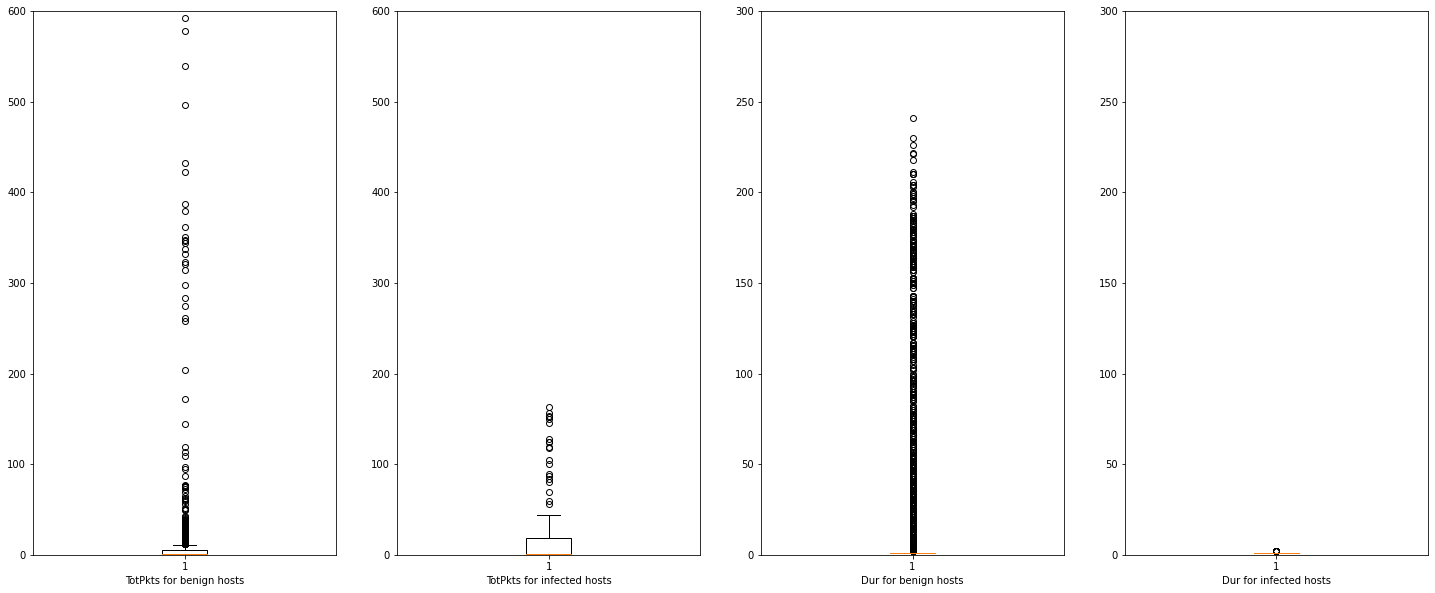

In [12]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))

ax1.boxplot(df_fragment_benign[features[0]].value_counts())
ax1.set_xlabel(f'{features[0]} for benign hosts')
ax1.set_ylim(0, 600)

ax2.boxplot(df_fragment_infected[features[0]].value_counts())
ax2.set_xlabel(f'{features[0]} for infected hosts')
ax2.set_ylim(0, 600)

ax3.boxplot(df_fragment_benign[features[1]].value_counts())
ax3.set_xlabel(f'{features[1]} for benign hosts')
ax3.set_ylim(0, 300)

ax4.boxplot(df_fragment_infected[features[1]].value_counts())
ax4.set_xlabel(f'{features[1]} for infected hosts')
ax4.set_ylim(0, 300)

plt.show()

### 1b. Discretize selected features

In [13]:
def discretize(discretizer, feature_array):
    """
    Discretizes the passed data.

    Arguments:
        discretizer: Discretizer, fitted with the learning data
        feature_array: Numpy array with data to discretize, using the passed discretizer
    Returns:
        Discretized data, passed as feature_array argument
    """
    bins = discretizer.transform(feature_array)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))

    return vectorizer(bins)

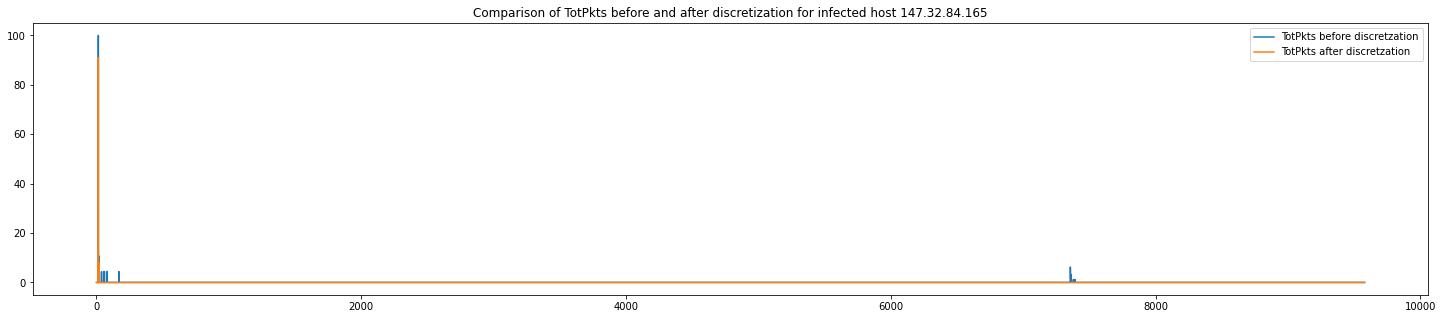

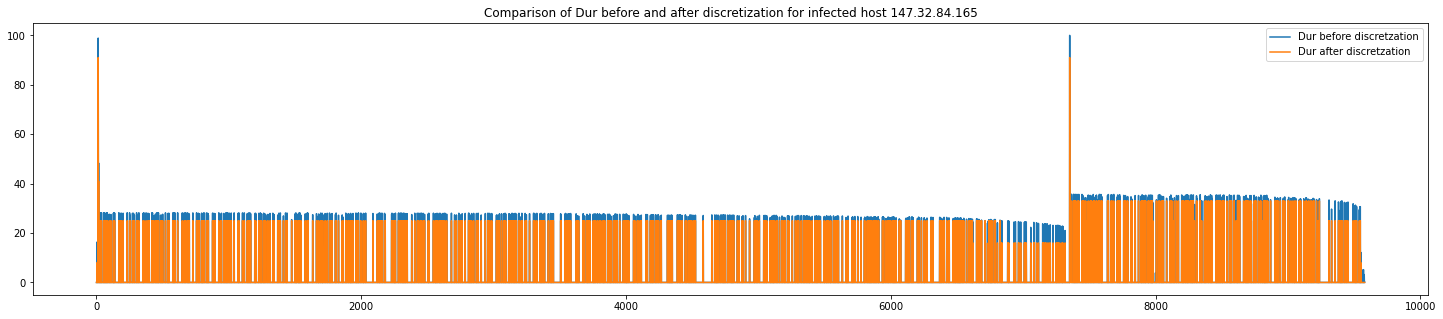

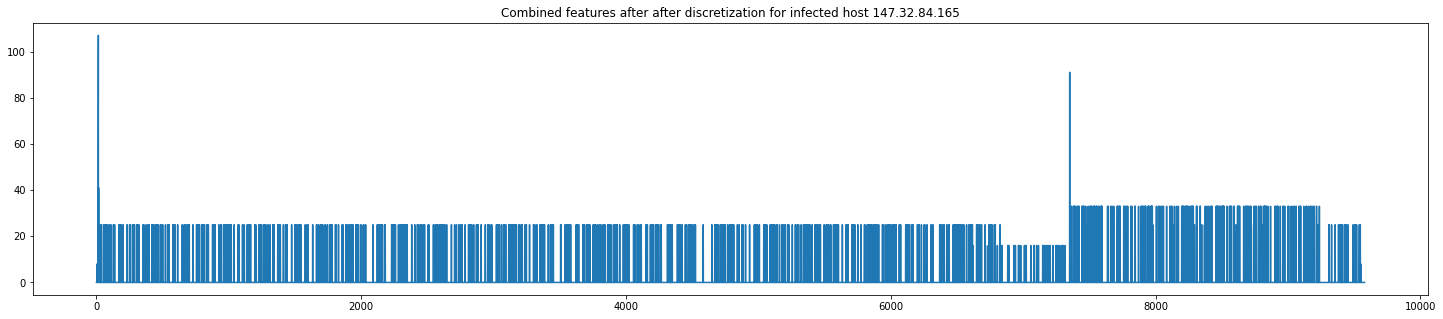

In [14]:
# Ignoring the FutureWarning which is internally thrown by NearestNeighbors
#warnings.simplefilter(action='ignore', category=UserWarning)
# choose a host

host = '147.32.84.165'
df_host = df[df['SrcAddr'] == host]
features_combined = np.zeros(len(df_host[[features[0]]]))

for i in range(len(features)):
    discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
    df_feature = df_host[[features[i]]].to_numpy()
    df_feature = MinMaxScaler(feature_range=(0,100)).fit_transform(df_feature)
    discretizer.fit(df_feature)
    feature_discretized = discretize(discretizer, df_feature)
    features_combined += feature_discretized
    _, ax = plt.subplots(1, 1, figsize=(25, 5))
    #ax.set_ylim([None, 10000])
    ax.plot(df_feature)
    ax.plot(feature_discretized)
    ax.legend(labels=[f'{features[i]} before discretzation', f'{features[i]} after discretzation'], loc='upper right')
    ax.set_title(f'Comparison of {features[i]} before and after discretization for infected host 147.32.84.165') 
    plt.show()

_, ax = plt.subplots(1, 1, figsize=(25, 5))
#ax.set_ylim([None, 20])
ax.plot(features_combined)
ax.set_title(f'Combined features after after discretization for infected host 147.32.84.165') 
plt.show()

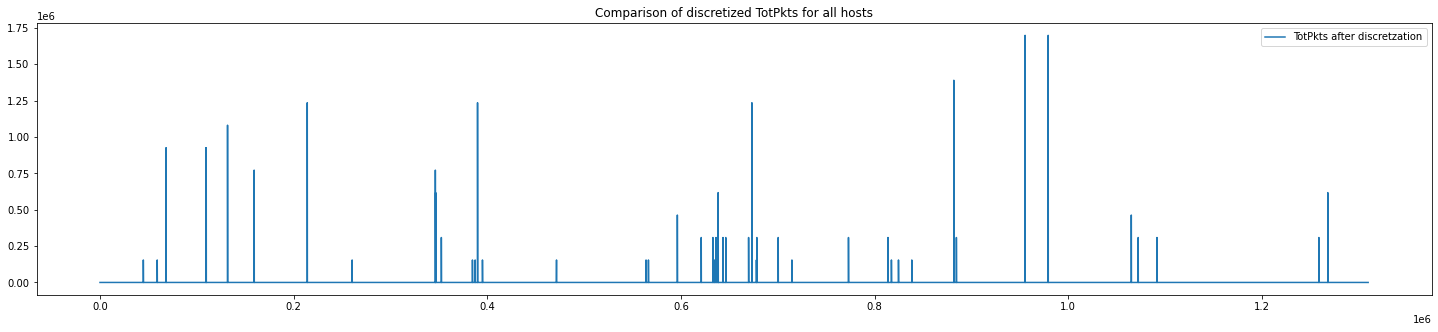

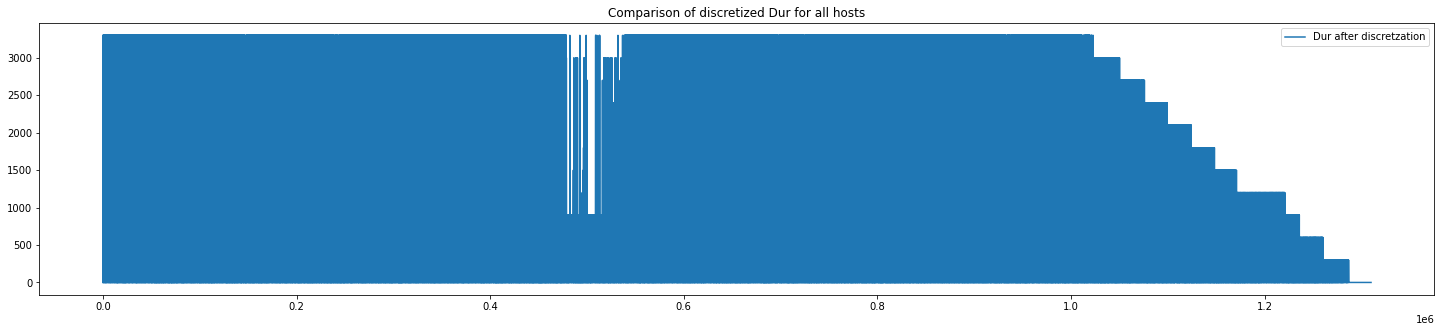

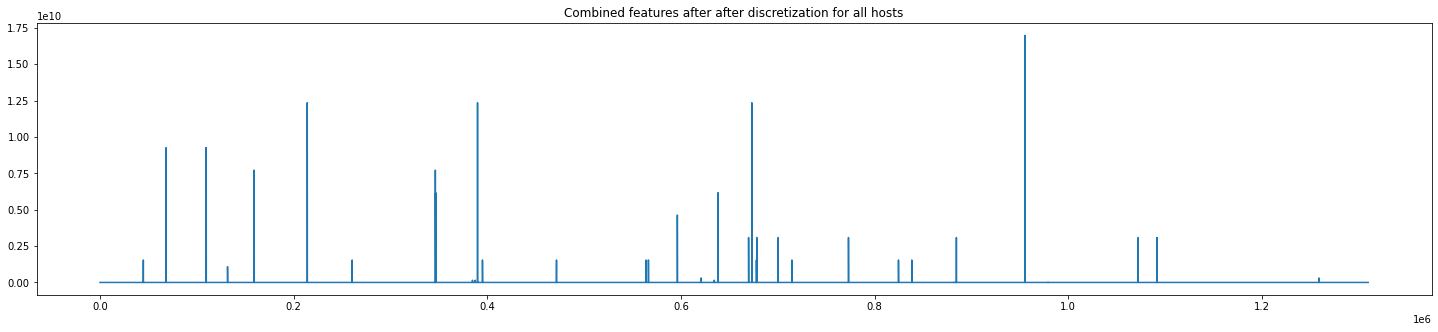

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,TotPkts_Dur
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,10
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt,10
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established,10
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10


In [15]:
# applying to all hosts
comb_col_name = features[0] + '_' + features[1]
features_combined = np.zeros(len(df[[features[0]]]))

for i in range(len(features)):
    discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
    df_feature = df[[features[i]]].to_numpy()
    bins = discretizer.fit_transform(df_feature)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))
    feature_discretized = vectorizer(bins)
    if i == 0:
        features_combined = list(map(str, feature_discretized))
    else:
        temp = list(map(str, feature_discretized))
        for j in range(len(features_combined)):
            features_combined[j] += temp[j]
    _, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.plot(feature_discretized)
    ax.legend(labels=[f'{features[i]} after discretzation'], loc='upper right')
    ax.set_title(f'Comparison of discretized {features[i]} for all hosts')
    plt.show()

features_combined = np.asarray(list(map(int, features_combined)))
df[comb_col_name] = features_combined
_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(features_combined)
ax.set_title(f'Combined features after after discretization for all hosts') 
plt.show()
df.head()

### 1c. Answers and explanation

Firstly, when analyzing the correlation plots for benign and infected traffic, we notice that for the infected hosts, the correlation between the number of packets and the number of bytes sent is higher. This might mean that each packet sent by an infected host had a similar size, so sending more packets also resulted in more bytes.


## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

Author: Konrad Ponichtera

### 2a. COUNT-MIN sketch


In [16]:
def concatenate_ngram(ngram):
    result = ""
    for x in ngram:
        result += str(x)
    return int(result)


def hash_value(x, prime1, prime2, prime3):
    return (prime1 * x + prime1) % prime2


hash_functions = [
    lambda x: hash_value(x, 181, 3499, 3767),
    lambda x: hash_value(x, 787, 3853, 5351),
    lambda x: hash_value(x, 349, 4337, 2897),
    lambda x: hash_value(x, 617, 2591, 5297),
    lambda x: hash_value(x, 881, 5303, 5857),
    lambda x: hash_value(x, 271, 2579, 1811),
    lambda x: hash_value(x, 419, 5563, 3329),
    lambda x: hash_value(x, 137, 4241, 2383),
    lambda x: hash_value(x, 179, 5087, 6053),
    lambda x: hash_value(x, 877, 3413, 7411)
]


def build_sketch_table(data, sketch_width, ngram_step=1, log_progress=False, log_time=False):
    sketch_height = len(hash_functions)
    sketch = np.zeros((sketch_height, sketch_width))

    start_time = time.time()

    for i in range(0, len(data) - 3, ngram_step):
        ngram = concatenate_ngram(data[i:i+3])
        
        for j in range(sketch_height):
            column_to_increment = hash_functions[j](ngram) % sketch_width
            sketch[j][column_to_increment] += 1
        
        if log_progress and i % 100000 == 0:
            print(f'Progress: {int(i/len(data)* 100)}%')

    end_time = time.time() - start_time
    if log_time:
        print(f'Building sketch table of size ({sketch_height}, {sketch_width}) for {len(data)} entries took {end_time} seconds')
    
    return sketch, end_time

#### Count the actual distribution of 3-grams

In [17]:
# Used to store mapping of the concatenated 3-gram to the real one (numpy array)
ngram_mapping = {}
real_ngram_counts = {}

start_time = time.time()

for i in range(0, len(features_combined) - 3):
    ngram = concatenate_ngram(features_combined[i:i+3])
    
    if ngram in real_ngram_counts:
        real_ngram_counts[ngram] += 1
    else:
        real_ngram_counts[ngram] = 1
        ngram_mapping[ngram] = str(features_combined[i:i+3])
        
    if i % 100000 == 0:
        print(f'Progress: {int(i/len(features_combined)* 100)}%')

end_time = time.time() - start_time

print(f'Collecting all the 3-grams took {end_time} seconds')

Progress: 0%
Progress: 7%
Progress: 15%
Progress: 22%
Progress: 30%
Progress: 38%
Progress: 45%
Progress: 53%
Progress: 61%
Progress: 68%
Progress: 76%
Progress: 83%
Progress: 91%
Progress: 99%


#### Build the sketch table

In [18]:
sketch_table_widths = [100, 250, 500, 750, 1000]

sketch_tables = []
sketch_tables_exec_times = []

for sketch_table_width in sketch_table_widths:
    sketch, exec_time = build_sketch_table(features_combined, sketch_width=sketch_table_width, log_time=True)
    sketch_tables += [sketch]
    sketch_tables_exec_times += [exec_time]


Building sketch table of size (10, 100) for 1309791 entries took 12.234358310699463 seconds
Building sketch table of size (10, 250) for 1309791 entries took 12.330671787261963 seconds
Building sketch table of size (10, 500) for 1309791 entries took 12.19347357749939 seconds
Building sketch table of size (10, 750) for 1309791 entries took 12.18468976020813 seconds
Building sketch table of size (10, 1000) for 1309791 entries took 12.14669680595398 seconds


In [19]:
pd.DataFrame(sketch_tables[-1])

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,8.0,65.0,153.0,7.0,12.0,60.0,423.0,8008.0,69.0,11723.0,...,3582.0,13.0,313.0,0.0,48.0,279.0,13.0,120.0,862.0,280.0
1,0.0,2006.0,73.0,76.0,105.0,2.0,0.0,5197.0,4.0,342.0,...,0.0,175.0,8.0,32.0,0.0,2.0,207.0,5.0,0.0,1.0
2,147.0,7.0,9.0,117.0,23.0,0.0,20.0,4.0,243.0,83.0,...,9.0,32.0,2.0,22.0,3.0,1.0,12.0,29.0,0.0,77.0
3,137.0,23.0,148.0,185.0,403.0,2.0,0.0,518.0,15.0,1.0,...,7.0,0.0,91.0,3.0,0.0,37.0,3.0,18.0,1.0,1.0
4,218.0,0.0,14.0,4.0,50.0,113.0,0.0,6.0,292.0,40.0,...,15.0,9757.0,11.0,67.0,200.0,9.0,1.0,47.0,0.0,360.0
5,6573.0,49.0,0.0,20.0,3.0,5.0,50.0,4.0,18.0,67.0,...,4.0,0.0,3347.0,2.0,71.0,1.0,8.0,0.0,40.0,1.0
6,1.0,32.0,5.0,73.0,19501.0,1045.0,1.0,1.0,205.0,9.0,...,0.0,174.0,8.0,161.0,8.0,8.0,5.0,0.0,83.0,4.0
7,1.0,123.0,260.0,6.0,151.0,0.0,5.0,21.0,0.0,0.0,...,5.0,46.0,323.0,424.0,0.0,149.0,3.0,1.0,0.0,3.0
8,198.0,1.0,5.0,85.0,3.0,18.0,993.0,33.0,113.0,0.0,...,17946.0,12.0,284.0,0.0,2.0,2.0,1392.0,219.0,5.0,78.0
9,492.0,4.0,6567.0,21.0,13.0,13.0,49.0,0.0,142.0,4003.0,...,8.0,8.0,0.0,0.0,69.0,22.0,4.0,25.0,7.0,182.0


#### Calculate approximate distribution of the 3-grams

In [20]:
def calculate_approximation_statistics(data, sketch_table, log_time=False):
    approx_ngram_counts = {}

    start_time = time.time()

    for ngram in unique_ngrams:
        ngram_count_estimates = []

        for j in range(len(hash_functions)):
            column = hash_functions[j](ngram) % sketch_table.shape[1]
            ngram_count_estimates += [sketch_table[(j, column)]]

        approx_ngram_counts[ngram] = min(ngram_count_estimates)

    end_time = time.time() - start_time

    if log_time:
        print(f'Approximating the 3-grams took {end_time} seconds')
        
    df_ngram_counts = pd.DataFrame.from_dict({'RealCount': real_ngram_counts, 'ApproximateCount': approx_ngram_counts})

    df_ngram_counts['ApproximationError'] = df_ngram_counts['ApproximateCount'] - df_ngram_counts['RealCount']
    df_ngram_counts['3-gram'] = df_ngram_counts.index
    df_ngram_counts['3-gram'] = df_ngram_counts['3-gram'].apply(lambda x: ngram_mapping[x])
    df_ngram_counts.reset_index(inplace=True, drop=True)
        
    return df_ngram_counts, end_time

In [21]:
unique_ngrams = real_ngram_counts.keys()

approximation_stats = []
approximation_exec_times = []

for sketch_table in sketch_tables:
    stats, exec_time = calculate_approximation_statistics(feature_discretized, sketch_table, log_time=True)
    approximation_stats += [stats]
    approximation_exec_times += [exec_time]

Approximating the 3-grams took 0.012183427810668945 seconds
Approximating the 3-grams took 0.01328420639038086 seconds
Approximating the 3-grams took 0.012562990188598633 seconds
Approximating the 3-grams took 0.01204824447631836 seconds
Approximating the 3-grams took 0.01157379150390625 seconds


In [22]:
print(f'10 most frequent 3-grams and their frequencies when approximated by sketch table of width {sketch_table_widths[0]}:')
approximation_stats[0].sort_values(by=['ApproximateCount'], ascending=False).head(10)

10 most frequent 3-grams and their frequencies when approximated by sketch table of width 100:


,RealCount,ApproximateCount,ApproximationError,3-gram
0,951390,951553.0,163.0,[10 10 10]
18,19471,19889.0,418.0,[ 10 10 13000]
17,19583,19710.0,127.0,[13000 10 10]
19,17943,18038.0,95.0,[ 10 13000 10]
20,11665,11923.0,258.0,[ 10 10 13300]
34,11639,11759.0,120.0,[13300 10 10]
14,11148,11466.0,318.0,[ 10 10 1900]
65,11186,11414.0,228.0,[1900 10 10]
64,10903,10982.0,79.0,[ 10 1900 10]
21,10642,10795.0,153.0,[ 10 13300 10]


In [23]:
print(f'10 most frequent 3-grams and their frequencies when approximated by sketch table of width {sketch_table_widths[-1]}:')
approximation_stats[-1].sort_values(by=['ApproximateCount'], ascending=False).head(10)

10 most frequent 3-grams and their frequencies when approximated by sketch table of width 1000:


,RealCount,ApproximateCount,ApproximationError,3-gram
0,951390,951390.0,0.0,[10 10 10]
17,19583,19583.0,0.0,[13000 10 10]
18,19471,19471.0,0.0,[ 10 10 13000]
19,17943,17943.0,0.0,[ 10 13000 10]
20,11665,11665.0,0.0,[ 10 10 13300]
34,11639,11639.0,0.0,[13300 10 10]
65,11186,11186.0,0.0,[1900 10 10]
14,11148,11148.0,0.0,[ 10 10 1900]
64,10903,10903.0,0.0,[ 10 1900 10]
21,10642,10642.0,0.0,[ 10 13300 10]


#### Comparison of actual and approximate 3-gram counts

In [24]:
for i in range(len(approximation_stats)):
    stats = approximation_stats[i]
    correctly_estimated_ngrams = stats.loc[stats['ApproximationError'] == 0]
    print(f'***** Sketch table of size ({len(hash_functions)}, {sketch_table_widths[i]}) *****')
    print(f'Out of {len(unique_ngrams)} 3-grams, {len(correctly_estimated_ngrams)} were estimated ideally')
    print('Approximation error statistics:')
    print(stats['ApproximationError'].describe())


***** Sketch table of size (10, 100) *****
Out of 1749 3-grams, 0 were estimated ideally
Approximation error statistics:
count    1749.000000
mean      262.285878
std       137.240842
min         8.000000
25%       150.000000
50%       246.000000
75%       356.000000
max       998.000000
Name: ApproximationError, dtype: float64
***** Sketch table of size (10, 250) *****
Out of 1749 3-grams, 11 were estimated ideally
Approximation error statistics:
count    1749.000000
mean       34.281304
std        34.328834
min         0.000000
25%        13.000000
50%        22.000000
75%        42.000000
max       233.000000
Name: ApproximationError, dtype: float64
***** Sketch table of size (10, 500) *****
Out of 1749 3-grams, 387 were estimated ideally
Approximation error statistics:
count    1749.000000
mean        4.826186
std         6.173834
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        67.000000
Name: ApproximationError, dtype: float64
***** S

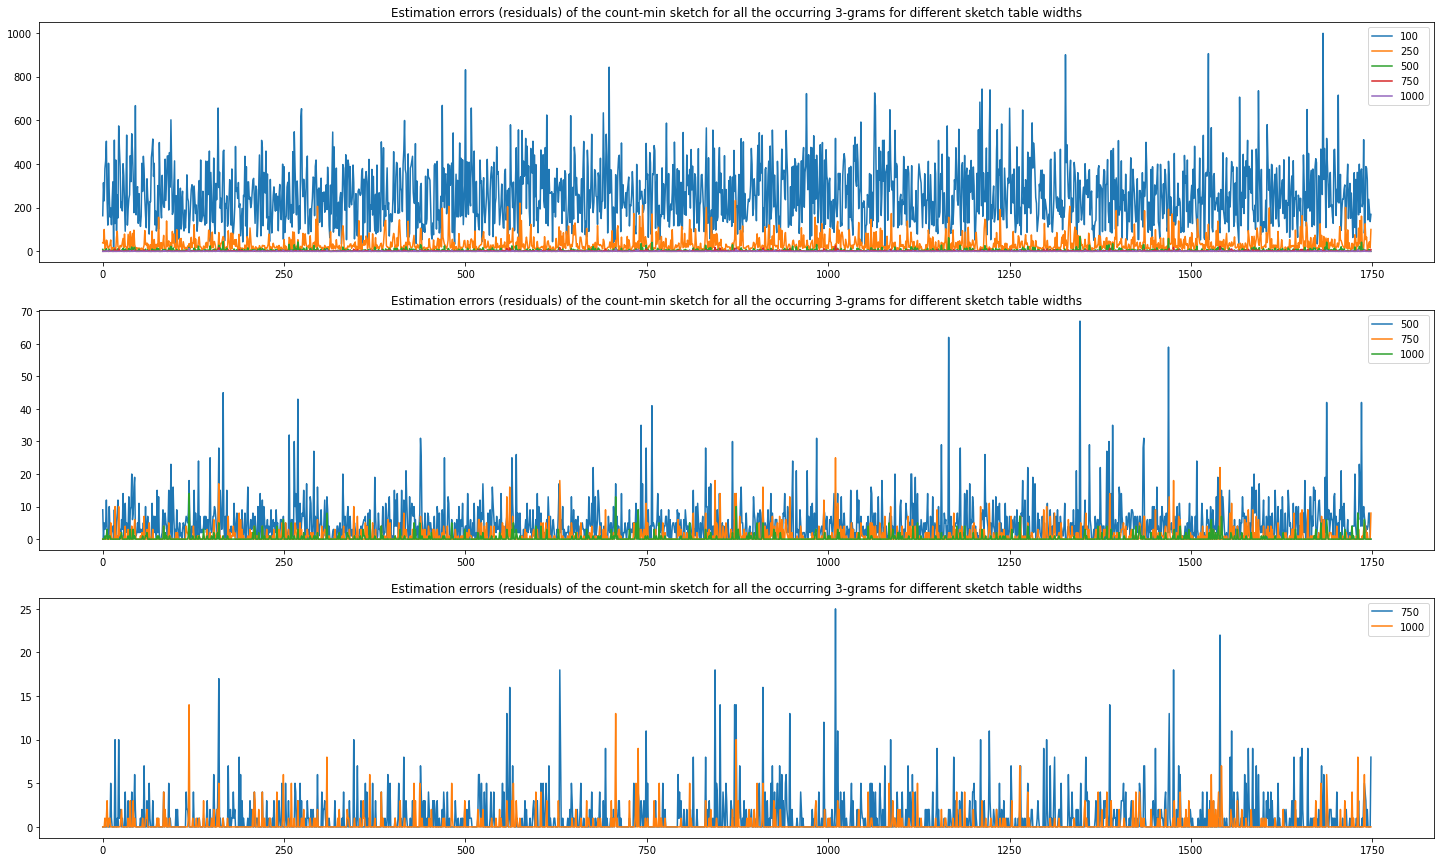

In [25]:
_, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25, 15))

start_plotting_idx = 0

for i in range(start_plotting_idx, len(approximation_stats)):
    ax1.plot(approximation_stats[i]['ApproximationError'])
    
ax1.set_title('Estimation errors (residuals) of the count-min sketch for all the occurring 3-grams for different sketch table widths')
ax1.legend(sketch_table_widths[start_plotting_idx:])

start_plotting_idx = int(len(approximation_stats) * 0.5)

for i in range(start_plotting_idx, len(approximation_stats)):
    ax2.plot(approximation_stats[i]['ApproximationError'])

ax2.set_title('Estimation errors (residuals) of the count-min sketch for all the occurring 3-grams for different sketch table widths')
ax2.legend(sketch_table_widths[start_plotting_idx:])

start_plotting_idx = int(len(approximation_stats) * 0.75)

for i in range(start_plotting_idx, len(approximation_stats)):
    ax3.plot(approximation_stats[i]['ApproximationError'])

ax3.set_title('Estimation errors (residuals) of the count-min sketch for all the occurring 3-grams for different sketch table widths')
ax3.legend(sketch_table_widths[start_plotting_idx:])
    
plt.show()

#### Memory usage comparison

       Size
100    8128
250   20128
500   40128
750   60128
1000  80128


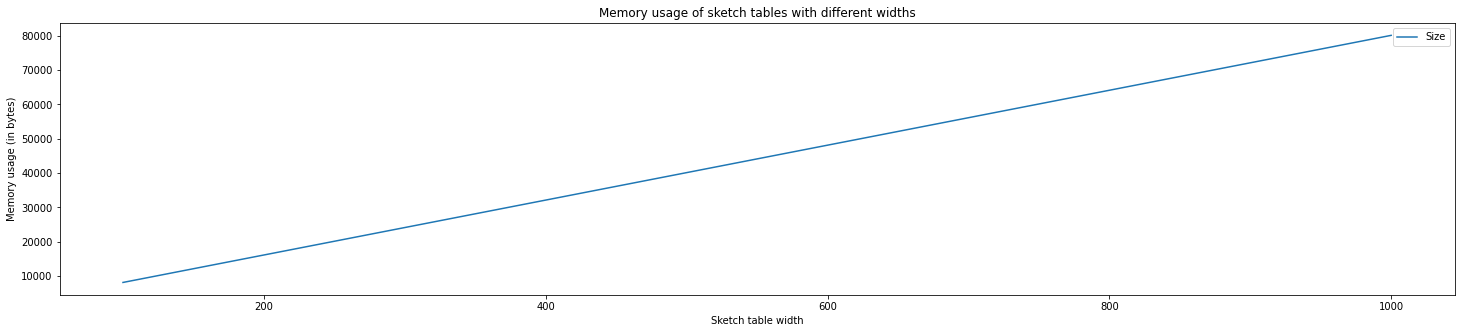

In [26]:
sketch_table_sizes = []

for i in range(len(sketch_tables)):
    bytes_usage = pd.DataFrame(sketch_tables[i]).memory_usage().sum()
    sketch_table_sizes += [bytes_usage]
    
df_sketch_table_sizes = pd.DataFrame({ 'Size': sketch_table_sizes }, index=sketch_table_widths)
    
print(df_sketch_table_sizes)
    
_, ax = plt.subplots(1, 1, figsize=(25, 5))
    
df_sketch_table_sizes.plot(ax=ax)
ax.set_title('Memory usage of sketch tables with different widths')
ax.set_xlabel('Sketch table width')
ax.set_ylabel('Memory usage (in bytes)')
plt.show()

### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

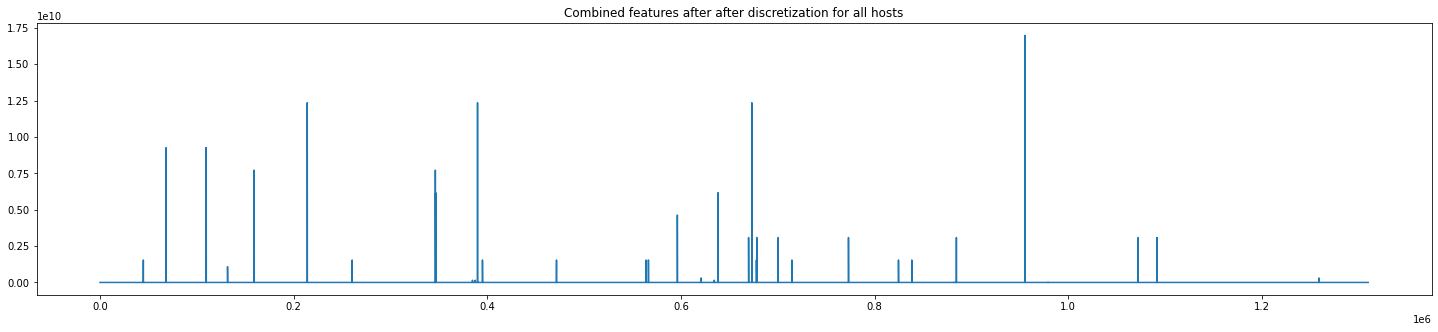

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,TotPkts_Dur
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,10
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt,10
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established,10
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10


In [27]:
df = pd.read_csv("data/dataset_10/capture20110818.binetflow")
features = ['TotPkts', 'Dur']
comb_col_name = 'TotPkts_Dur'
features_combined = np.zeros(len(df[[features[0]]]))

for i in range(len(features)):
    discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
    df_feature = df[[features[i]]].to_numpy()
    bins = discretizer.fit_transform(df_feature)[:, 0]
    vectorizer = np.vectorize(lambda x: int(discretizer.bin_edges_[0][int(x)]))
    feature_discretized = vectorizer(bins)
    if i == 0:
        features_combined = list(map(str, feature_discretized))
    else:
        temp = list(map(str, feature_discretized))
        for i in range(len(features_combined)):
            features_combined[i] += temp[i]

features_combined = np.asarray(list(map(int, features_combined)))
df[comb_col_name] = features_combined
_, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.plot(features_combined)
ax.set_title(f'Combined features after after discretization for all hosts') 
plt.show()
df.head()

In [28]:
counts = df.groupby(['SrcAddr', 'DstAddr']).count()
# create a set of ip pairs which appear more than 3 times
ip_profiles = set()
for row in counts.iterrows():
    if row[1][0] >= 3:
        ip_profiles.add(row[0])
print(len(ip_profiles))

# create a set of all possible ngrams
gram_set = set()
sorted_stuff = df.sort_values(['SrcAddr', 'DstAddr']).reset_index()[comb_col_name]
for i in range(len(sorted_stuff) - 2):
    gram_set.add((sorted_stuff[i], sorted_stuff[i + 1], sorted_stuff[i + 2]))
print(len(gram_set))
#with np.nditer(df[comb_col_name], op_flags=['read']) as it:
#    for val in it:


44851
1825


In [29]:
df_test = df.copy()
temp = []
df_test.apply(lambda x: temp.append((x['SrcAddr'], x['DstAddr'])), axis=1)
df_test['IPProfile'] = temp
df_test.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,TotPkts_Dur,IPProfile
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,10,"(93.45.239.29, 147.32.84.118)"
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt,10,"(62.240.166.118, 147.32.84.229)"
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established,10,"(147.32.86.148, 66.235.132.232)"
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10,"(147.32.3.51, 147.32.84.46)"
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,10,"(88.212.37.169, 147.32.84.118)"


In [30]:
df_test = df_test.sort_values(['SrcAddr', 'DstAddr'])
df_test = df_test.reset_index()
src_dst_ip = df_test['IPProfile']
combined_feature = df_test[comb_col_name]

ip_profiles_dict = dict()
ip_profiles = list(ip_profiles)
gram_list = list(gram_set)
for i in range(len(ip_profiles)):
    ip_profiles_dict[ip_profiles[i]] = np.zeros(len(gram_list))

In [31]:
for i in range(len(src_dst_ip) - 2):
    if src_dst_ip[i] == src_dst_ip[i + 1] == src_dst_ip[i + 2]:
        ngram = (combined_feature[i], combined_feature[i + 1], combined_feature[i + 2])
        gram_index = gram_list.index(ngram)
        ip_profiles_dict[src_dst_ip[i]][gram_index] = 1

KeyboardInterrupt: 

In [ ]:
# similarity matrix
matrix = np.array(np.asarray(list(ip_profiles_dict.values())))


In [ ]:
def min_hash(characteristic_matrix, bin_size):
    hash_func1 = lambda x: x + 1 % bin_size
    hash_func2 = lambda x: 3 * x + 1 % bin_size
    hash_func3 = lambda x: hash(x)

    for row in characteristic_matrix:
        
min_hash(matrix, len(matrix))

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.